In [1]:
import json
import pandas as pd

In [2]:
file1 = 'ultimate_data_challenge.json'
file2 = 'logins.json'

with open(file1) as json_file1:
    json_data1 = json.load(json_file1)

df1 = pd.DataFrame(json_data1)

with open(file2) as json_file2:
    json_data2 = json.load(json_file2)

df2 = pd.DataFrame(json_data2)

# Part 1
The   attached    logins.json    file   contains   (simulated)   timestamps   of   user   logins   in   a   particular
geographic   location.   Aggregate   these   login   counts   based   on   15­ minute   time   intervals,   and
visualize   and   describe   the   resulting   time   series   of   login   counts   in   ways   that   best   characterize   the
underlying   patterns   of   the   demand.   Please   report/illustrate   important   features   of   the   demand,
such   as   daily   cycles.   If   there   are   data   quality   issues,   please   report   them.

In [3]:
# changing date columns to datetime
df1.signup_date = pd.to_datetime(df1.signup_date)
df1.last_trip_date = pd.to_datetime(df1.last_trip_date)

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


In [4]:
print(df2.info())
df2
# no clue what this is so, not gonna use it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null object
dtypes: object(1)
memory usage: 727.8+ KB
None


,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
5,1970-01-01 20:21:41
6,1970-01-01 20:12:16
7,1970-01-01 20:35:47
8,1970-01-01 20:35:38
9,1970-01-01 20:47:52


In [5]:
# checking for nans
for col in df1:
    print(col, df1[col].isnull().values.any())

print(df1.avg_rating_by_driver .isnull().sum(),
      df1.avg_rating_of_driver.isnull().sum())
# lots of nans in these 2 columns, can I fill reasonably?

avg_dist False
avg_rating_by_driver True
avg_rating_of_driver True
avg_surge False
city False
last_trip_date False
phone True
signup_date False
surge_pct False
trips_in_first_30_days False
ultimate_black_user False
weekday_pct False
201 8122


In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(df1['avg_rating_by_driver'].dropna())
plt.show()
plt.hist(df1['avg_rating_of_driver'].dropna())
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [7]:
df1[['avg_rating_by_driver', 'avg_rating_of_driver']].corr()
# can't be fill reasonably with correlation

,avg_rating_by_driver,avg_rating_of_driver
avg_rating_by_driver,1.000000,0.123175
avg_rating_of_driver,0.123175,1.000000


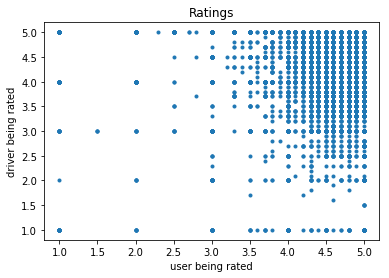

4.778158195947439 4.6015592912744685


In [8]:
plt.plot(df1['avg_rating_by_driver'], df1['avg_rating_of_driver'],
         marker='.', linestyle='none')
plt.title('Ratings')
plt.xlabel('user being rated')
plt.ylabel('driver being rated')
plt.show()

print(np.mean(df1['avg_rating_by_driver']),
      np.mean(df1['avg_rating_of_driver']))

Will just drop nans, correlation is weak and distribution.

In [9]:
df1.dropna(inplace=True)

In [10]:
df1['length_of_user'] = (df1.last_trip_date - df1.signup_date).dt.days

df1

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,length_of_user
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,143
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,96
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,1
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,170
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,47
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0,148
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0,1
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0,11
10,4.28,4.9,5.0,1.00,Winterfell,2014-05-30,iPhone,2014-01-13,0.0,1,True,100.0,137
11,3.81,5.0,4.0,1.00,Winterfell,2014-01-10,iPhone,2014-01-06,0.0,3,False,100.0,4


In [11]:
print(df1.phone.value_counts(), '\n\n', df1.city.value_counts())

iPhone     29352
Android    12093
Name: phone, dtype: int64 

 Winterfell        19161
Astapor           13509
King's Landing     8775
Name: city, dtype: int64


# Part 2
The   neighboring   cities   of   Gotham   and   Metropolis   have   complementary   circadian   rhythms:   on
weekdays,   Ultimate   Gotham   is   most   active   at   night,   and   Ultimate   Metropolis   is   most   active
during   the   day.   On   weekends,   there   is   reasonable   activity   in   both   cities.
However,   a   toll   bridge,   with   a   two ­way   toll,   between   the   two   cities   causes   driver   partners   to   tend
to   be   exclusive   to   each   city.   The   Ultimate   managers   of   city   operations   for   the   two   cities   have
proposed   an   experiment   to   encourage   driver   partners   to   be   available   in   both   cities,   by
reimbursing   all   toll   costs.
1. What   would   you   choose   as   the   key   measure   of   success   of   this   experiment   in
encouraging   driver   partners   to   serve   both   cities,   and   why   would   you   choose   this   metric?
2. Describe   a   practical   experiment   you   would   design   to   compare   the   effectiveness   of   the
proposed   change   in   relation   to   the   key   measure   of   success.   Please   provide   details   on: 

    a. how   you   will   implement   the   experiment

    b. what   statistical   test(s)   you   will   conduct   to   verify   the   significance   of   the observation

    c. how   you   would   interpret   the   results   and   provide   recommendations   to   the   city operations   team   along   with   any   caveats.

1. The measure of success should be if we have gained more revenue than the total cost of the tolls while, having an increase in ultimate black user among those populations. Other metrics should be kept an eye on:rating of drivers should not decrease in any meaningful way.

2. We can start telling select drivers who seem to travel between these two cities that we will cover their tolls. We can run t-tests to see if our averages were effected significantly.

# Part   3   ‑   Predictive   modeling
Ultimate   is   interested   in   predicting   rider   retention.   To   help   explore   this   question,   we   have
provided   a   sample   dataset   of   a   cohort   of   users   who   signed   up   for   an   Ultimate   account   in
January   2014.   The   data   was   pulled   several   months   later;   we   consider   a   user   retained   if   they
were   “active”   (i.e.   took   a   trip)   in   the   preceding   30   days.
We   would   like   you   to   use   this   data   set   to   help   understand   what   factors   are   the   best   predictors
for   retention,   and   offer   suggestions   to   operationalize   those   insights   to   help   Ultimate.
The   data   is   in   the   attached   file   ultimate_data_challenge.json.   See   below   for   a   detailed
description   of   the   dataset.   Please   include   any   code   you   wrote   for   the   analysis   and   delete   the
dataset   when   you   have   finished   with   the   challenge.
1. Perform   any   cleaning,   exploratory   analysis,   and/or   visualizations   to   use   the   provided
data   for   this   analysis   (a   few   sentences/plots   describing   your   approach   will   suffice).   What
fraction   of   the   observed   users   were   retained?
2. Build   a   predictive   model   to   help   Ultimate   determine   whether   or   not   a   user   will   be   active
in   their   6th   month   on   the   system.   Discuss   why   you   chose   your   approach,   what
alternatives   you   considered,   and   any   concerns   you   have.   How   valid   is   your   model?
Include   any   key   indicators   of   model   performance.
3. Briefly   discuss   how   Ultimate   might   leverage   the   insights   gained   from   the   model   to
improve   its   long­ term   rider   retention   (again,   a   few   sentences   will   suffice)

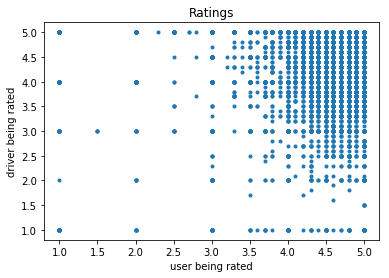

4.776445892145956 4.601720352273912


In [12]:
plt.plot(df1['avg_rating_by_driver'], df1['avg_rating_of_driver'],
         marker='.', linestyle='none')
plt.title('Ratings')
plt.xlabel('user being rated')
plt.ylabel('driver being rated')
plt.show()

print(np.mean(df1['avg_rating_by_driver']),
      np.mean(df1['avg_rating_of_driver']))

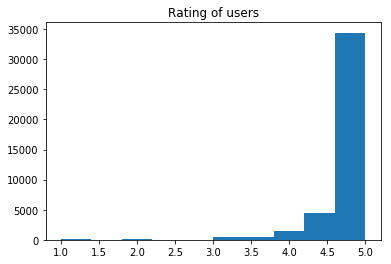

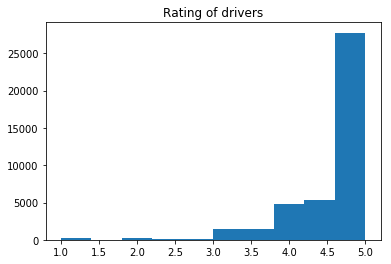

In [13]:
plt.hist(df1['avg_rating_by_driver'].dropna())
plt.title('Rating of users')
plt.show()
plt.hist(df1['avg_rating_of_driver'].dropna())
plt.title('Rating of drivers')
plt.show()

Ratings are not symmetry but at least many ratings are high

In [14]:
df1.corr()
# just surge_pct and avg_surge share high correlation

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,length_of_user
avg_dist,1.000000,0.083190,0.034877,-0.085750,-0.110894,-0.136471,0.027206,0.102048,-0.110475
avg_rating_by_driver,0.083190,1.000000,0.122413,0.012418,0.019703,-0.045788,0.005708,0.018312,-0.048269
avg_rating_of_driver,0.034877,0.122413,1.000000,-0.022209,-0.001696,-0.011849,-0.003292,0.012975,-0.017018
avg_surge,-0.085750,0.012418,-0.022209,1.000000,0.795737,-0.000262,-0.070613,-0.118999,-0.014241
surge_pct,-0.110894,0.019703,-0.001696,0.795737,1.000000,0.005370,-0.099814,-0.155179,0.007314
trips_in_first_30_days,-0.136471,-0.045788,-0.011849,-0.000262,0.005370,1.000000,0.115066,0.055556,0.157384
ultimate_black_user,0.027206,0.005708,-0.003292,-0.070613,-0.099814,0.115066,1.000000,0.033964,0.185729
weekday_pct,0.102048,0.018312,0.012975,-0.118999,-0.155179,0.055556,0.033964,1.000000,0.015941
length_of_user,-0.110475,-0.048269,-0.017018,-0.014241,0.007314,0.157384,0.185729,0.015941,1.000000


Highest correlation is between avg_surge and surge_pct while they don't measure the same thing, it seems that users who ride on busy days tend to always do it.

In [15]:
print(len(df1.loc[df1.length_of_user > 180]), '\n',
      max(df1['last_trip_date']))

12 
 2014-07-01 00:00:00


In [16]:
# create target, y variable will be 0 or 1 if last trip was in June

df1['y'] = df1['last_trip_date'].apply(lambda q: 1 if q.month == 6 else 0)

df1.loc[df1['y'] == 1]

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,length_of_user,y
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,143,1
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,170,1
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0,148,1
13,3.04,5.0,4.0,1.38,King's Landing,2014-06-08,iPhone,2014-01-29,50.0,0,False,50.0,130,1
16,10.86,3.0,5.0,1.00,King's Landing,2014-06-28,Android,2014-01-11,0.0,1,True,50.0,168,1
18,6.83,4.8,4.6,1.21,King's Landing,2014-06-24,iPhone,2014-01-28,30.8,6,True,80.8,147,1
19,12.08,5.0,5.0,1.17,King's Landing,2014-06-03,iPhone,2014-01-02,33.3,0,False,66.7,152,1
23,7.74,5.0,5.0,1.00,King's Landing,2014-06-13,Android,2014-01-21,0.0,0,True,100.0,143,1
31,11.86,5.0,4.9,1.00,Winterfell,2014-06-14,iPhone,2014-01-25,0.0,1,False,40.0,140,1
32,10.01,5.0,4.0,2.00,Winterfell,2014-06-10,iPhone,2014-01-05,100.0,1,False,100.0,156,1


In [17]:
df_active = df1.loc[df1['y'] == 1]
df_nonactive = df1.loc[df1['y'] == 0]

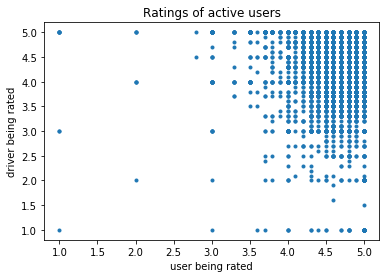

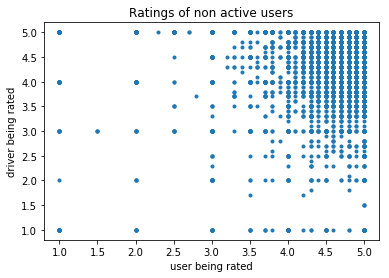

In [18]:
plt.plot(df_active['avg_rating_by_driver'],
         df_active['avg_rating_of_driver'], marker='.', linestyle='none')
plt.title('Ratings of active users')
plt.xlabel('user being rated')
plt.ylabel('driver being rated')
plt.show()

plt.plot(df_nonactive['avg_rating_by_driver'],
         df_nonactive['avg_rating_of_driver'], marker='.', linestyle='none')
plt.title('Ratings of non active users')
plt.xlabel('user being rated')
plt.ylabel('driver being rated')
plt.show()

ACTIVE


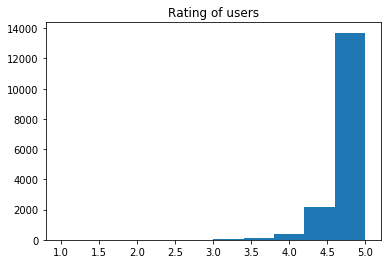

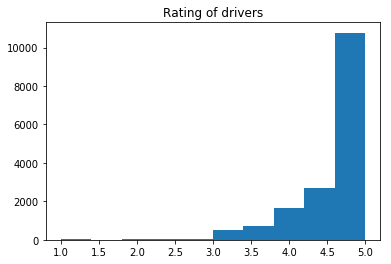

NON ACTIVE


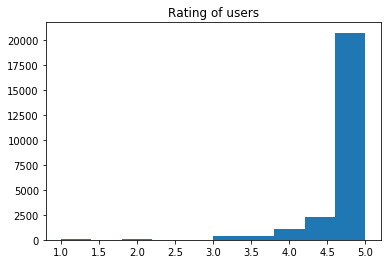

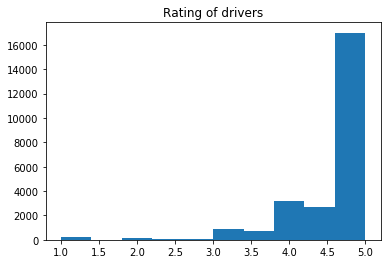

In [19]:
print('ACTIVE')
plt.hist(df_active['avg_rating_by_driver'].dropna())
plt.title('Rating of users')
plt.show()
plt.hist(df_active['avg_rating_of_driver'].dropna())
plt.title('Rating of drivers')
plt.show()

print('NON ACTIVE')
plt.hist(df_nonactive['avg_rating_by_driver'].dropna())
plt.title('Rating of users')
plt.show()
plt.hist(df_nonactive['avg_rating_of_driver'].dropna())
plt.title('Rating of drivers')
plt.show()

Seems that ratings are not too different between active and nonactive users. Although nonactive users does have more negative ratings than active users.

In [20]:
# calculates the percentage that are iphone users or that come from King's Lands or Winterland
def percentage(data):
    data_values = data.value_counts()
    return data_values.values[0]/sum(data_values.values)

In [21]:
print(df_nonactive.phone.value_counts(), '\n',
      percentage(df_nonactive.phone), '\n',
      df_active.phone.value_counts(), '\n',
      percentage(df_active.phone))

iPhone     15565
Android     9374
Name: phone, dtype: int64 
 0.624122859777858 
 iPhone     13787
Android     2719
Name: phone, dtype: int64 
 0.835272022294923


In [22]:
print(df_nonactive.city.value_counts(), '\n',
      percentage(df_nonactive.city), '\n',
      df_active.city.value_counts(), '\n',
      percentage(df_active.city))

Winterfell        11927
Astapor            9776
King's Landing     3236
Name: city, dtype: int64 
 0.47824692249087775 
 Winterfell        7234
King's Landing    5539
Astapor           3733
Name: city, dtype: int64 
 0.4382648733793772


In [23]:
print(df_nonactive.ultimate_black_user.value_counts(), '\n',
      percentage(df_nonactive.ultimate_black_user), '\n',
      df_active.ultimate_black_user.value_counts(), '\n',
      percentage(df_active.ultimate_black_user))

False    17448
True      7491
Name: ultimate_black_user, dtype: int64 
 0.6996270900998436 
 True     8428
False    8078
Name: ultimate_black_user, dtype: int64 
 0.5106022052586938


Active users tend to be iphone users, although altogether (percentage and raw numbers) there are more inactive users with iphones than active users with iphones  

City does not seem to affect active status

Ultimate black status seem to negatively affect active users



In [24]:
# make phones a dummy variable and change true falses to 1 and 0

df1.phone = df1.phone.apply(lambda phone: 1 if phone == 'iPhone' else 0)
df1.ultimate_black_user = df1.ultimate_black_user.apply(
    lambda truth: 1 if truth == True else 0)

df1

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,length_of_user,y
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,1,2014-01-25,15.4,4,1,46.2,143,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,0,2014-01-29,0.0,0,0,50.0,96,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,1,2014-01-06,0.0,3,0,100.0,1,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,1,2014-01-10,20.0,9,1,80.0,170,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,0,2014-01-27,11.8,14,0,82.4,47,0
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,1,2014-01-09,0.0,2,1,100.0,148,1
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,1,2014-01-28,0.0,2,0,100.0,1,0
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,0,2014-01-21,0.0,2,0,100.0,11,0
10,4.28,4.9,5.0,1.00,Winterfell,2014-05-30,1,2014-01-13,0.0,1,1,100.0,137,0
11,3.81,5.0,4.0,1.00,Winterfell,2014-01-10,1,2014-01-06,0.0,3,0,100.0,4,0


In [25]:
columns = df1.columns
for thing in range(len(columns)):
    print(thing, columns[thing])

0 avg_dist
1 avg_rating_by_driver
2 avg_rating_of_driver
3 avg_surge
4 city
5 last_trip_date
6 phone
7 signup_date
8 surge_pct
9 trips_in_first_30_days
10 ultimate_black_user
11 weekday_pct
12 length_of_user
13 y


In [26]:
from sklearn.model_selection import train_test_split

columns = [0, 1, 2, 3, 6, 8, 9, 10, 11]

X = df1.iloc[:, columns]
y = df1['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

X

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,1,15.4,4,1,46.2
1,8.26,5.0,5.0,1.00,0,0.0,0,0,50.0
2,0.77,5.0,4.3,1.00,1,0.0,3,0,100.0
3,2.36,4.9,4.6,1.14,1,20.0,9,1,80.0
4,3.13,4.9,4.4,1.19,0,11.8,14,0,82.4
5,10.56,5.0,3.5,1.00,1,0.0,2,1,100.0
7,2.04,5.0,5.0,1.00,1,0.0,2,0,100.0
8,4.36,5.0,4.5,1.00,0,0.0,2,0,100.0
10,4.28,4.9,5.0,1.00,1,0.0,1,1,100.0
11,3.81,5.0,4.0,1.00,1,0.0,3,0,100.0


In [27]:
# scoring function, will print out conusion matrix, roc, and sklearn score

from sklearn.metrics import roc_curve, auc, confusion_matrix


def scores(clf, y_test, X_test):
    y_pred = clf.predict(X_test)
    print(confusion_matrix(y_test, y_pred))

    false_positive_rate, true_positive_rate, thresholds = roc_curve(
        y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print('ROC:', roc_auc)
    print('score:', clf.score(X_test, y_test))

In [28]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(fit_intercept=False)

logit.fit(X_train, y_train)

y_pred = logit.predict(X_test)

scores(logit, y_test, X_test)

[[6706 1472]
 [3028 2471]]
ROC: 0.6346796596246339
score: 0.6709804781750384


In [29]:
from sklearn.model_selection import GridSearchCV

parameters = {'C': np.logspace(-1, 1, 10)}

logit = LogisticRegression()

clf = GridSearchCV(logit, parameters, cv=5)
clf.fit(X, y)

clf.best_score_

0.6708891301725178

In [30]:
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV(cv=5)

clf.fit(X, y)

clf.scores_[1]

array([[0.63341375, 0.65838359, 0.66634499, 0.66537998, 0.66537998,
        0.66489747, 0.66489747, 0.66489747, 0.66489747, 0.66489747],
       [0.64060803, 0.66871758, 0.67824828, 0.67812764, 0.67776571,
        0.67776571, 0.67776571, 0.67776571, 0.67776571, 0.67776571],
       [0.63324888, 0.66184099, 0.66630474, 0.66666667, 0.66630474,
        0.66630474, 0.66630474, 0.66630474, 0.66630474, 0.66630474],
       [0.63361081, 0.65737725, 0.67221619, 0.67209555, 0.67233683,
        0.67233683, 0.67233683, 0.67233683, 0.67233683, 0.67233683],
       [0.64032336, 0.66554054, 0.67326255, 0.67434846, 0.67398649,
        0.67398649, 0.67398649, 0.67398649, 0.67398649, 0.67398649]])

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

gbclassifer = GradientBoostingClassifier()

gbclassifer.fit(X_train, y_train)

scores(gbclassifer, y_test, X_test)

[[6826 1352]
 [2155 3344]]
ROC: 0.721394485517743
score: 0.7435841193244133


In [32]:
gbclassifer = GradientBoostingClassifier()

parameters = {'learning_rate': np.arange(.01, 2, 100)}

clf = GridSearchCV(gbclassifer, parameters, cv=5)
clf.fit(X, y)

clf.best_score_

0.7239474001688986

In [33]:
gbclassifer = GradientBoostingClassifier(loss='exponential')

gbclassifer.fit(X_train, y_train)

scores(gbclassifer, y_test, X_test)

[[6839 1339]
 [2146 3353]]
ROC: 0.723007631481586
score: 0.7451926592088909


In [34]:
gbclassifer = GradientBoostingClassifier(loss='exponential')

parameters = {'learning_rate': np.arange(.01, 1, 100)}

clf = GridSearchCV(gbclassifer, parameters, cv=5)
clf.fit(X, y)

clf.best_score_

0.7233200627337435

# Extras, not used

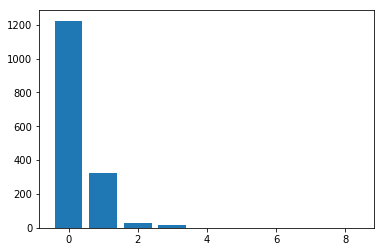

In [35]:
from sklearn.decomposition import PCA

pca = PCA()

pca.fit_transform(X, y)

q = pca.explained_variance_
plt.bar(range(len(q)), q)
plt.show()